In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [203]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Layer

In [213]:
startups=pd.read_csv("A:/Data Science/assignments/Neural network/50_Startups.csv")

In [205]:
del startups['State']

In [206]:
startups.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [208]:
from sklearn.preprocessing import MinMaxScaler
mod=MinMaxScaler()
scaled=mod.fit_transform(startups.iloc[:,0:5])
startup_scaled=pd.DataFrame(scaled,columns=startups.columns)

In [209]:
startup_scaled.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,1.000000,0.651744,1.000000,1.000000
1,0.983359,0.761972,0.940893,0.997355
2,0.927985,0.379579,0.864664,0.993178
3,0.873136,0.512998,0.812235,0.947292
4,0.859438,0.305328,0.776136,0.853171


In [210]:
X=startup_scaled.iloc[:,0:3]
y=startup_scaled.iloc[:,3]

In [211]:
y.head()

0    1.000000
1    0.997355
2    0.993178
3    0.947292
4    0.853171
Name: Profit, dtype: float64

In [214]:
State=pd.get_dummies(startups['State'])


In [215]:
frames=[X,State]
Startup_new=pd.concat(frames,axis=1)

In [216]:
Startup_new.head()

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
0,1.000000,0.651744,1.000000,0,0,1
1,0.983359,0.761972,0.940893,1,0,0
2,0.927985,0.379579,0.864664,0,1,0
3,0.873136,0.512998,0.812235,0,0,1
4,0.859438,0.305328,0.776136,0,1,0


In [217]:
Startup_new.shape

(50, 6)

In [218]:
X=Startup_new
y=startup_scaled.iloc[:,3]

In [224]:
X.shape

(50, 6)

In [220]:
from sklearn.model_selection import train_test_split

In [221]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [232]:
def prep_model(hiddendim):
    model=Sequential()
    for i in range(1,4):
        if (i==1):
            model.add(Dense(hiddendim[1],input_dim=hiddendim[0],kernel_initializer="normal",activation='linear'))
        else:
            model.add(Dense(hiddendim[i],activation='linear'))
    model.add(Dense(hiddendim[-1],activation='linear'))
    model.compile(loss='mean_squared_error',optimizer='adam',metrics = ["accuracy"])
    return model

In [233]:
hidden.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 50)                200       
_________________________________________________________________
dense_70 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_71 (Dense)             (None, 1)                 31        
_________________________________________________________________
dense_72 (Dense)             (None, 1)                 2         
Total params: 1,763
Trainable params: 1,763
Non-trainable params: 0
_________________________________________________________________


In [236]:
hiddendim=prep_model([6,50,30,1])


In [237]:
hiddendim.fit(X_train,y_train,epochs=30)

Epoch 1/30
40/40 [==============================] - 0s 4ms/step - loss: 0.3197 - accuracy: 0.0250
Epoch 2/30
40/40 [==============================] - 0s 175us/step - loss: 0.2181 - accuracy: 0.0250
Epoch 3/30
40/40 [==============================] - 0s 199us/step - loss: 0.1457 - accuracy: 0.0250
Epoch 4/30
40/40 [==============================] - 0s 225us/step - loss: 0.0875 - accuracy: 0.0250
Epoch 5/30
40/40 [==============================] - 0s 125us/step - loss: 0.0483 - accuracy: 0.0250
Epoch 6/30
40/40 [==============================] - 0s 175us/step - loss: 0.0274 - accuracy: 0.0250
Epoch 7/30
40/40 [==============================] - 0s 200us/step - loss: 0.0237 - accuracy: 0.0250
Epoch 8/30
40/40 [==============================] - 0s 125us/step - loss: 0.0280 - accuracy: 0.0250
Epoch 9/30
40/40 [==============================] - 0s 200us/step - loss: 0.0349 - accuracy: 0.0250
Epoch 10/30
40/40 [==============================] - 0s 175us/step - loss: 0.0368 - accuracy: 0.0250
E

In [238]:
predict_values=hiddendim.predict(X_test)

In [248]:
predict_values

array([[0.5005177 ],
       [0.29234034],
       [0.6434006 ],
       [0.68754035],
       [0.63289267],
       [0.93094593],
       [0.39141086],
       [0.46246216],
       [0.37988874],
       [0.6069994 ]], dtype=float32)

In [247]:
y_test.values

array([0.42812595, 0.15698988, 0.49893437, 0.7606613 , 0.67364377,
       1.        , 0.28448478, 0.19602019, 0.37348913, 0.52963376])

In [246]:
pred_train = pd.Series([i[0] for i in predict_values])
rmse_value = np.sqrt(np.mean((pred_train-y_test)**2))
rmse_value

0.36952301766332124

In [245]:
y_test

36    0.428126
47    0.156990
28    0.498934
9     0.760661
13    0.673644
0     1.000000
44    0.284485
46    0.196020
39    0.373489
23    0.529634
Name: Profit, dtype: float64

In [244]:
pred_train

0    0.500518
1    0.292340
2    0.643401
3    0.687540
4    0.632893
5    0.930946
6    0.391411
7    0.462462
8    0.379889
9    0.606999
dtype: float64

In [242]:
np.corrcoef(y_test,pred_train)

array([[1.        , 0.94132282],
       [0.94132282, 1.        ]])

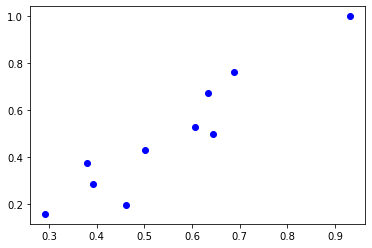

In [243]:
plt.plot(pred_train,y_test,'bo')

In [ ]:
#This model has 2 hidden layers and the accuracy of this model is 94%